# K-Means Clustering with Animation in Python

This Python script demonstrates the implementation of the K-Means clustering algorithm with a visualization of the clustering process through an animation. The script uses `numpy` for numerical operations, `matplotlib` for plotting. The process is divided into several steps:

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# If you want to create the animation
# from matplotlib.animation import FuncAnimation
# from IPython.display import HTML

## 2. Generate Synthetic Data

We start by generating synthetic data that simulates three different clusters. This is done using the `np.random.multivariate_normal` function to generate data points from multivariate normal distributions.

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for 3 clusters
mean1 = [2, 2]
cov1 = [[1, 0], [0, 1]]  # diagonal covariance, indicating no correlation
data1 = np.random.multivariate_normal(mean1, cov1, 100)

mean2 = [8, 8]
cov2 = [[1, 0], [0, 1]]
data2 = np.random.multivariate_normal(mean2, cov2, 100)

mean3 = [3, 7]
cov3 = [[1, 0], [0, 1]]
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Combine the data into a single array
data = np.vstack([data1, data2, data3])

## 3. Visualize the Generated Data

Before applying K-Means, it's helpful to visualize the generated data.

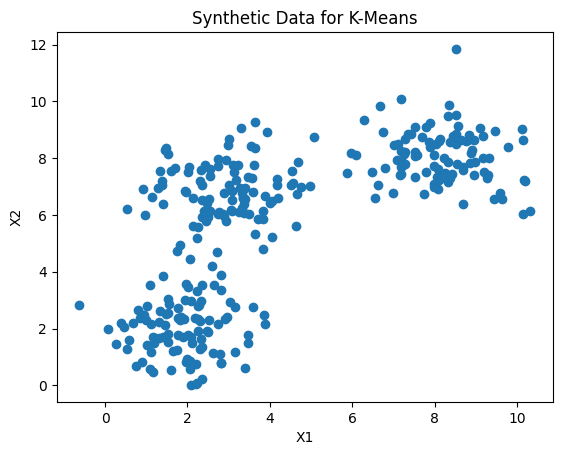

In [3]:
# Plot the data
plt.scatter(data[:, 0], data[:, 1])
plt.title('Synthetic Data for K-Means')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## 4. Define K-Means Functions

Several helper functions are defined to perform the steps of the K-Means algorithm: initializing centroids, assigning clusters, updating centroids, and the main `k_means` function.

In [4]:
# Initialize centroids randomly
def init_centroids(data, k):
    indices = np.random.choice(np.arange(data.shape[0]), size=k, replace=False)
    return data[indices]

# Assign clusters based on closest centroid
def assign_clusters(data, centroids):
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

# Update centroids to the mean of assigned points
def update_centroids(data, assignments, k):
    return np.array([data[assignments == i].mean(axis=0) for i in range(k)])

# Main K-Means clustering function
def k_means(data, k, max_iters=100):
    centroids = init_centroids(data, k)
    for _ in range(max_iters):
        assignments = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, assignments, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, assignments


## 5. Run K-Means and Visualize the Clusters

After defining the K-Means algorithm, it's executed on the synthetic data. The results are then visualized.

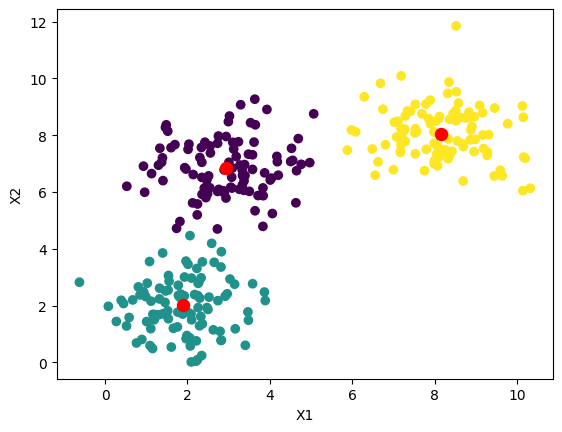

In [5]:
# Run K-Means
k = 3
centroids, assignments = k_means(data, k)

# Plot the results
plt.scatter(data[:, 0], data[:, 1], c=assignments, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='.')  # Centroids
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## 6. Create an Animation of the K-Means Process (Optional)

Finally, we use `matplotlib.animation.FuncAnimation` to create an animation showing the iterative process of K-Means clustering.

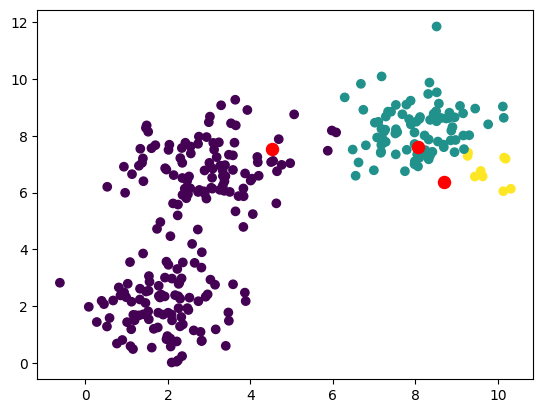

In [8]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
# K-Means algorithm for animation
def k_means_animation(data, k, max_iters=10):
    centroids = init_centroids(data, k)
    for _ in range(max_iters):
        assignments = assign_clusters(data, centroids)
        yield centroids, assignments
        centroids = update_centroids(data, assignments, k)



fig, ax = plt.subplots()
def update(frame):
    centroids, assignments = frame
    ax.clear()
    ax.scatter(data[:, 0], data[:, 1], c=assignments, cmap='viridis')
    ax.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='.')  # Centroids

ani = FuncAnimation(fig, update, frames=k_means_animation(data, k, max_iters=10), interval=1000, save_count=10)

HTML(ani.to_jshtml())